# Challenge 1: Titanic

- [How many people were on the titanic?](#How-many-people-were-on-the-titanic?)
- [How many men and women survived?](#How-many-men-and-women-survived?)
- [What was the top 10 age group that survived the most and the top 10 age group that did not?](#What-was-the-top-10-age-group-that-survived-the-most-and-the-top-10-age-group-that-did-not?)
- [How many positions or titles were on the boat? Example: Captains, Mrs. Miss, etc.](#How-many-positions-or-titles-were-on-the-boat?-Example:-Captains,-Mrs.-Miss,-etc.)
- [How much is the sum of the value of the tickets in USD?](#How-much-is-the-sum-of-the-value-of-the-tickets-in-USD?)

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv(f'files/test.csv')
df_train = pd.read_csv(f'files/train.csv')
df_gender = pd.read_csv(f'files/gender_submission.csv')

In [3]:
df_test.shape

(418, 11)

In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_gender.shape

(418, 2)

In [8]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Merge & Concat DataFrames

In [9]:
df_complete = pd.merge(df_test, df_gender, how='inner', on="PassengerId")
df_complete = pd.concat([df_train, df_complete])

In [10]:
df_complete.shape

(1309, 12)

In [11]:
df_complete.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How many people were on the titanic?

In [12]:
passengers, _ = df_complete.shape

print(f"There were {passengers} on the titanic")

There were 1309 on the titanic


## How many men and women survived?

In [13]:
df_survivors = df_complete.copy()
df_survivors = df_survivors[df_survivors['Survived'] == 1].groupby("Sex")['Sex'].count()
df_survivors

Sex
female    385
male      109
Name: Sex, dtype: int64

In [14]:
print(f"{df_survivors['female']} women and {df_survivors['male']} men survived")

385 women and 109 men survived


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9831db3d0>],
      dtype=object)

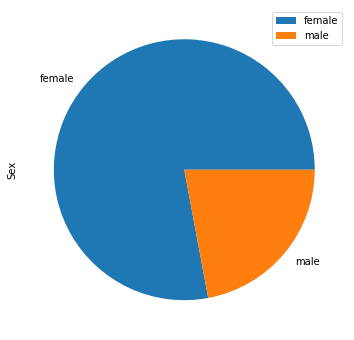

In [15]:
plot = df_survivors.plot.pie(subplots=True, x='', legend=True,figsize=(11, 6))
plot

## What was the top 10 age group that survived the most and the top 10 age group that did not?

In [16]:
df_top_age = df_complete.copy()
df_top_age.dropna(subset=['Age'], inplace=True)
df_top_age['Age'] = df_top_age['Age'].apply(int)

In [17]:
df_top_age = df_top_age.groupby(['Age', 'Survived'])['Age'].count().to_frame('Count').reset_index()
df_top_age.sort_values(by=["Count"], ascending=False, inplace=True)
df_top_age

,Age,Survived,Count
41,21,0,33
47,24,0,28
49,25,0,27
59,30,0,26
55,28,0,26
...,...,...,...
10,5,0,1
122,63,0,1
29,15,0,1
15,7,1,1


In [18]:
print("Top 10 age that survived")
top_survivors = df_top_age[df_top_age['Survived'] == 1][['Age', 'Count']].head(10)
top_survivors

Top 10 age that survived


,Age,Count
44,22,21
48,24,20
36,18,17
72,36,16
60,30,16
54,27,15
70,35,14
58,29,13
90,45,12
38,19,12


In [19]:
print("Top 10 age that not survived")

top_not_survivors = df_top_age[df_top_age['Survived'] == 0][['Age', 'Count']].head(10)
top_not_survivors

Top 10 age that not survived


,Age,Count
41,21,33
47,24,28
49,25,27
59,30,26
55,28,26
35,18,25
43,22,23
51,26,21
63,32,18
57,29,17


In [20]:
%matplotlib inline 

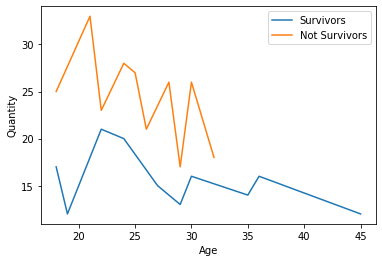

In [21]:
top_survivors.sort_values(by=["Age"], inplace=True)
top_not_survivors.sort_values(by=["Age"], inplace=True)

plt.plot(top_survivors["Age"], top_survivors['Count'], label="Survivors")
plt.plot(top_not_survivors["Age"], top_not_survivors['Count'], label="Not Survivors")

plt.legend(loc='upper right')
plt.xlabel("Age")
plt.ylabel("Quantity")

plt.show()

## How many positions or titles were on the boat? Example: Captains, Mrs. Miss, etc.

In [22]:
def validate_position(name):
    title = re.findall(r"\,\s([\w\s]+)+\.", name)
    return title[0] if title else ''

In [23]:
df_positions = df_complete.copy()
df_positions['Title'] = df_positions["Name"].apply(validate_position)
df_positions[['PassengerId', 'Age', 'Title']]

,PassengerId,Age,Title
0,1,22.0,Mr
1,2,38.0,Mrs
2,3,26.0,Miss
3,4,35.0,Mrs
4,5,35.0,Mr
...,...,...,...
413,1305,NaN,Mr
414,1306,39.0,Dona
415,1307,38.5,Mr
416,1308,NaN,Mr


In [24]:
positions = df_positions['Title'].nunique()

print(f"There were {positions} titles/positions on the boat")

There were 18 titles/positions on the boat


## How much is the sum of the value of the tickets in USD?

In [25]:
fare = df_complete["Fare"].sum()
print(f"Value of the tickets: {fare}")

Value of the tickets: 43550.4869
